In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import array
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

plt.rcParams['text.usetex'] = True

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

sns.set_style("whitegrid")

In [2]:
df_jets = {'df': uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd'),				'color' : 'blue', 	'label': 'jets'}


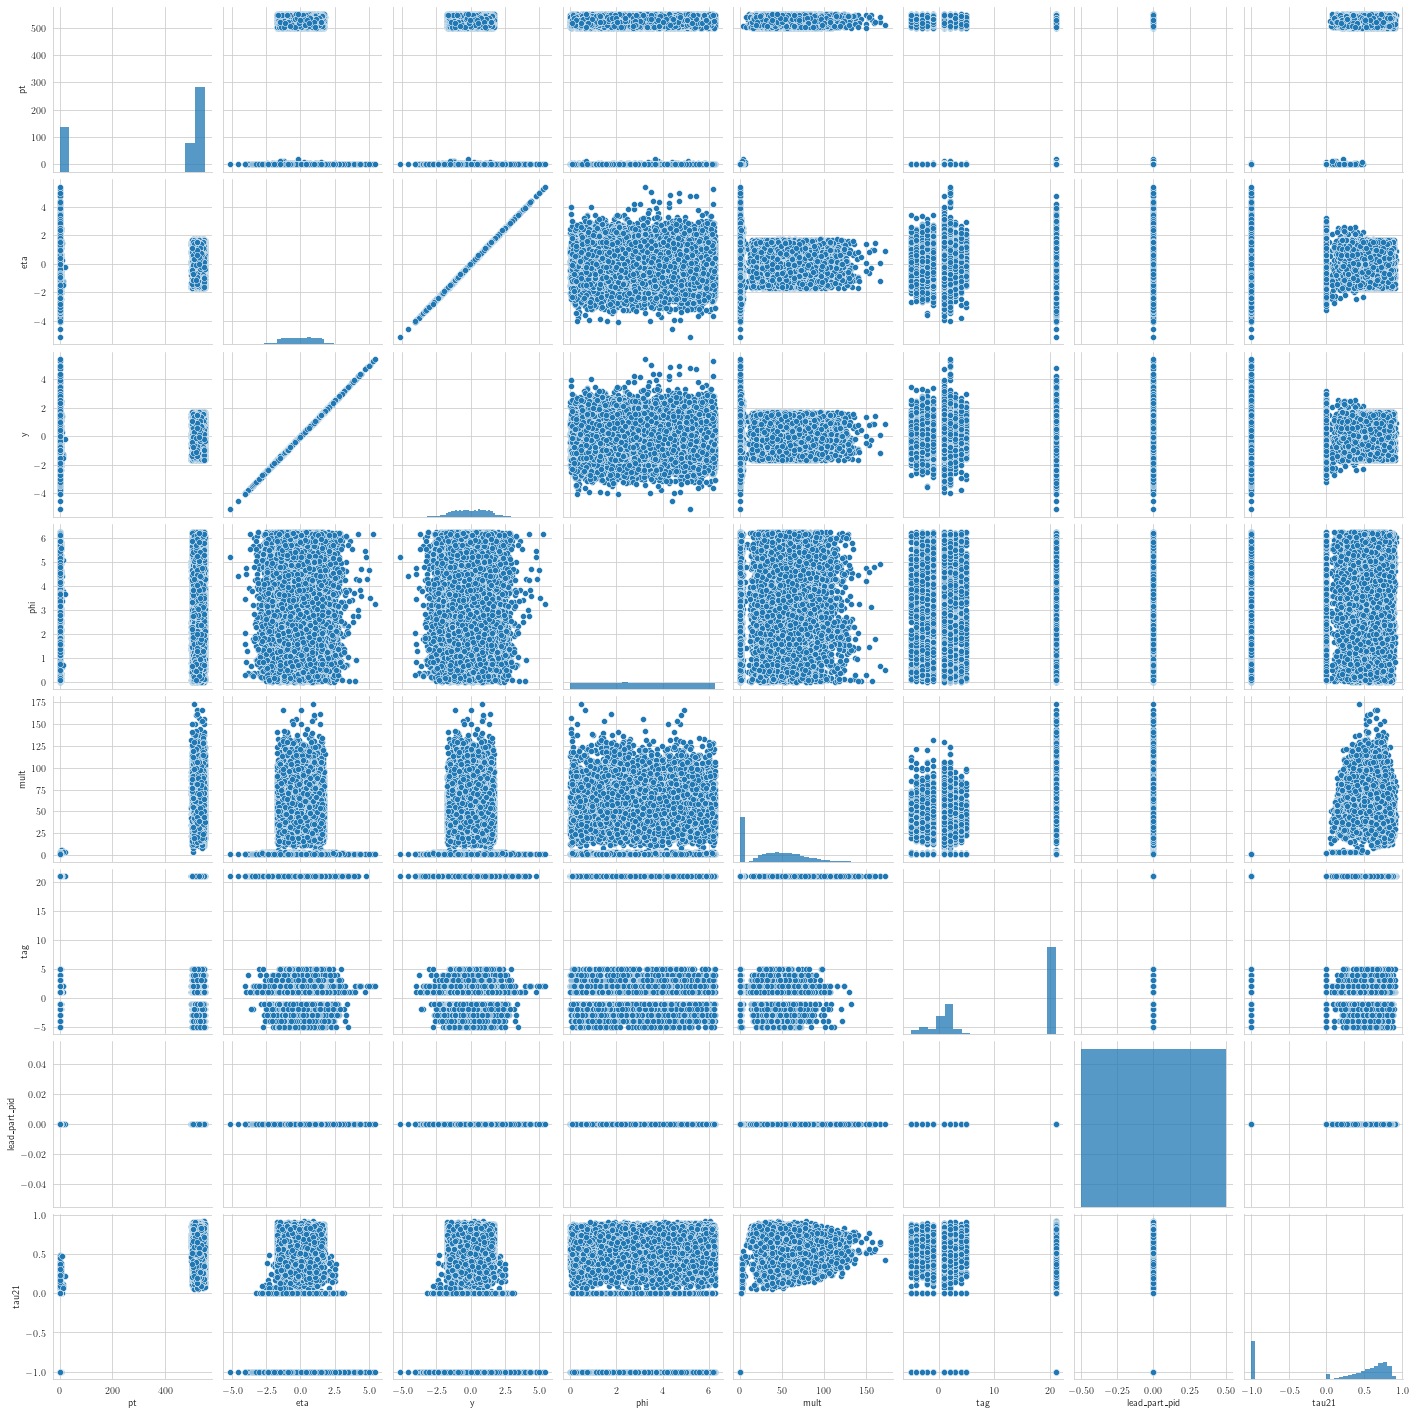

In [3]:
g = sns.pairplot(df_jets['df'])
plt.show()

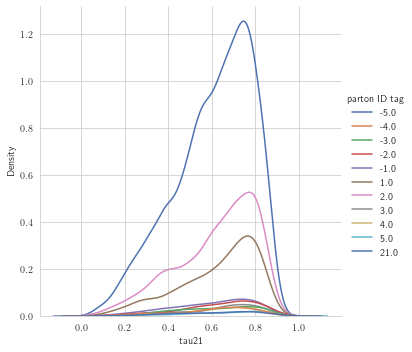

In [4]:
df = df_jets['df']
_p = sns.displot(data=df[df['tau21']>0], x='tau21', hue='tag', kind='kde', palette = 'deep')
_p._legend.set_title('parton ID tag')


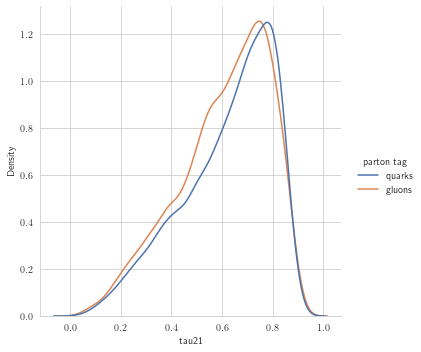

In [5]:
df_quarks = uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./hardQCD_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])
_p = sns.displot(data=df_labelled[df_labelled['tau21']>0], x='tau21', hue='label', kind='kde', palette = 'deep')
_p._legend.set_title('parton tag')


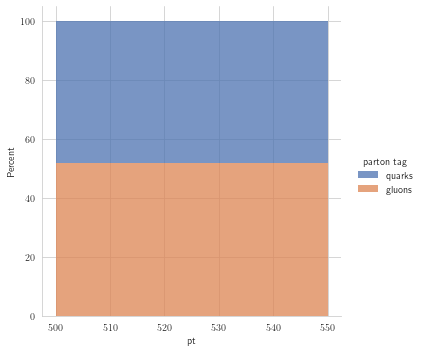

In [6]:
_p = sns.displot(data=df_labelled[df_labelled['pt']>500], x='pt', stat='percent', hue='label', kind='hist', kde=False, multiple="stack", palette = 'deep', binwidth=50)
_p._legend.set_title('parton tag')

/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:454: RuntimeWarning: overflow encountered in power
  edges = np.power(10, edges)
/home/ploskon/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/ploskon/.local/lib/python3.8/site-packages/seaborn/distributions.py:459: RuntimeWarning: invalid value encountered in multiply
  edges = edges[:-1] + (1 - shrink) / 2 * orig_widths


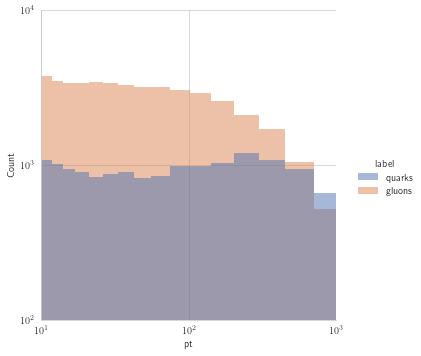

In [7]:
df_all = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_all['label'] = 'all'

df_quarks = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])

lspace = np.logspace(np.log10(1.),np.log10(1000.), 100)
logbins = array.array('f', lspace)
_p = sns.displot(data=df_labelled[df_labelled['pt']>5.], x='pt', stat='count', hue='label', kind='hist', kde=False, palette = 'deep', bins=logbins, log_scale=[True, True])
# _p._legend.set_title('14 TeV - parton tag')
_p.set(ylim=[1e2,1e4], xlim=[10.0, 1000.])


In [8]:
def plot_ratio(x1, x2, bins, x1label='x1', x2label='x2'):
	fig, (ax1, ax2) = plt.subplots(nrows=2)
	val_of_bins_x1, edges_of_bins_x1, patches_x1 = ax1.hist(x1, bins=bins, alpha=0.2, label=x1label)
	val_of_bins_x2, edges_of_bins_x2, patches_x2 = ax1.hist(x2, bins=bins, alpha=0.2, label=x2label)
	ax1.set_yscale('log')
	ax1.set_ylim([1, 1e5])
	ax1.legend()

	ratio = np.divide(val_of_bins_x1, val_of_bins_x2, where=(val_of_bins_x2 != 0))
	error = np.divide(val_of_bins_x1 * np.sqrt(val_of_bins_x2) + val_of_bins_x2 * np.sqrt(val_of_bins_x1), np.power(val_of_bins_x2, 2), where=(val_of_bins_x2 != 0))
	bincenter = 0.5 * (edges_of_bins_x1[1:] + edges_of_bins_x1[:-1])
	ax2.errorbar(bincenter, ratio, yerr=error, fmt='.', color='r')
	ax2.set_xscale('log')
	ax2.set_ylim([0, 1])
	ax2.set_xlim([10., 2.e3])
	ax2.legend()
	ax2.set_ylabel('{} / {}'.format(x1label, x2label))
	# ax2.xaxis.set_minor_locator(AutoMinorLocator())
	ax2.xaxis.set_major_locator(LogLocator(base=10))
	ax2.xaxis.set_minor_locator(LogLocator(base=10,subs=(1.0,2.0,5.0,8.0)))
	# ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
	fig.tight_layout()
	
	return [bincenter, ratio, error]


In [9]:
lspace = np.logspace(np.log10(10.),np.log10(1.2e3), 20)
logbins = array.array('f', lspace)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


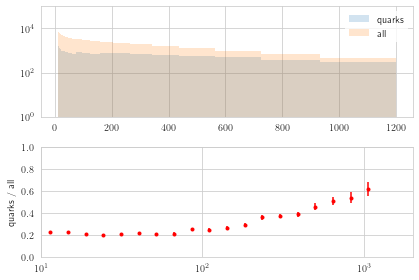

In [10]:
df_all = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_all['label'] = 'all'

df_quarks = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./v2_hard_QCD_jets/R04_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])

r04_14 = plot_ratio(df_quarks['pt'], df_all['pt'], logbins, 'quarks', 'all')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


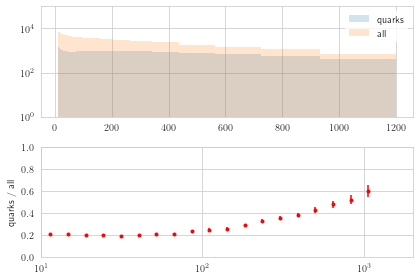

In [11]:
df_all = uproot.open('./v2_hard_QCD_jets/R08_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_all['label'] = 'all'

df_quarks = uproot.open('./v2_hard_QCD_jets/R08_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./v2_hard_QCD_jets/R08_14TeV_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])

r08_14 = plot_ratio(df_quarks['pt'], df_all['pt'], logbins, 'quarks', 'all')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


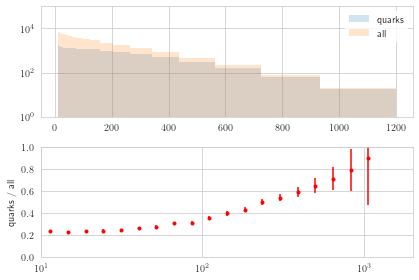

In [12]:
df_all = uproot.open('./v2_hard_QCD_jets/R04_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_all['label'] = 'all'

df_quarks = uproot.open('./v2_hard_QCD_jets/R04_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./v2_hard_QCD_jets/R04_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])

r04_5 = plot_ratio(df_quarks['pt'], df_all['pt'], logbins, 'quarks', 'all')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


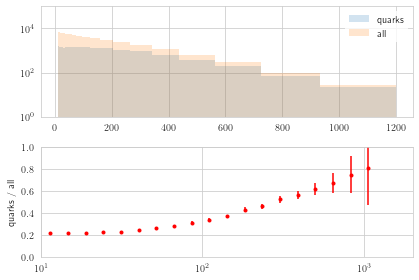

In [13]:
df_all = uproot.open('./v2_hard_QCD_jets/R08_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_all['label'] = 'all'

df_quarks = uproot.open('./v2_hard_QCD_jets/R08_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_quarks = df_quarks[df_quarks['tag']<21]
df_quarks['label'] = 'quarks'

df_gluons = uproot.open('./v2_hard_QCD_jets/R08_5TeV_jets.root')['tnjets'].arrays(library='pd')
df_gluons = df_gluons[df_gluons['tag']>=21]
df_gluons['label'] = 'gluons'
df_labelled = pd.concat([df_quarks, df_gluons])

r08_5 = plot_ratio(df_quarks['pt'], df_all['pt'], logbins, 'quarks', 'all')

In [14]:
print(len(r04_14[0]), len(r04_14[1]))

19 19


In [15]:
dd = {}
dd['R=0.4 @ 5 TeV'] = r04_5[1]
dd['R=0.8 @ 5 TeV'] = r08_5[1]
dd['R=0.4 @ 14 TeV'] = r04_14[1]
dd['R=0.8 @ 14 TeV'] = r08_14[1]

# dd['x'] = r04_5[0]
xa = r04_5[0]

dfs = []
for r in dd:
	_df = pd.DataFrame.from_dict({'ratio': dd[r], 'label': r, 'pt': xa})
	dfs.append(_df)

df = pd.concat(dfs, axis=0, ignore_index=True)
# df.describe(include='all')
df.head(n=100)


,ratio,label,pt
0,0.237213,R=0.4 @ 5 TeV,11.432808
1,0.230575,R=0.4 @ 5 TeV,14.709012
2,0.238087,R=0.4 @ 5 TeV,18.924049
3,0.239573,R=0.4 @ 5 TeV,24.346958
4,0.245896,R=0.4 @ 5 TeV,31.323860
...,...,...,...
71,0.378608,R=0.8 @ 14 TeV,389.207520
72,0.425694,R=0.8 @ 14 TeV,500.739441
73,0.476454,R=0.8 @ 14 TeV,644.232117
74,0.521114,R=0.8 @ 14 TeV,828.844360


Text(0, 0.5, 'Fraction')

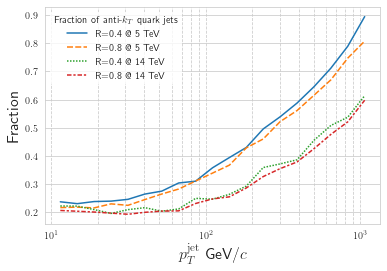

In [16]:
_p = sns.lineplot(data=df, x='pt', style='label', hue='label', y='ratio')
_p.legend(title=r'Fraction of anti-$k_{T}$ quark jets')
_p.set(xscale='log')

_p.axes.grid(True, which="both", axis='x', ls="--")
locmin = LogLocator(base=10, subs=np.arange(0.1,1,0.1), numticks=10)  
_p.axes.xaxis.set_minor_locator(locmin)
plt.xlabel(r'$p_{T}^{\mathrm{jet}}$ GeV/$c$', fontsize=16)
plt.ylabel('Fraction', fontsize=16)

In [17]:
r04_5[0]

array([  11.432808,   14.709012,   18.92405 ,   24.346958,   31.32386 ,
         40.30008 ,   51.848534,   66.70633 ,   85.82181 ,  110.41504 ,
        142.05576 ,  182.76349 ,  235.13649 ,  302.51758 ,  389.20752 ,
        500.73944 ,  644.2321  ,  828.84436 , 1066.3594  ], dtype=float32)